In [89]:
import json
import requests
import datetime as dt
import numpy as np
import pandas as pd
from binance.client import Client
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import \
    TimeSeriesSplit  # you have everything done for you
# for time-series cross-validation set 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Getting data for last year with 30 min interval

In [47]:
api_key='hKmlFuyZiyNlaN6ARvCKnhF5owS6yrVJolMeSBfThE5Hc6L26aRM2Z3N8EuVQf0y'
secret_key='B4c5Cr9vwsubR19XK05axHk6aSGhnP91GdXLY57LlaYoUNMf4s5egKIHhtgfJYAd'

client = Client(api_key, secret_key)

df= pd.DataFrame(client.get_historical_klines('BTCUSDT','30m',
                                              str((dt.datetime.now() - dt.timedelta(weeks=52))),
                                              str((dt.datetime.now()))))

df.columns=['open_time','open','high','low','close','volume',
           'close_time','q_vol','trades','taker_buy_volume',
            'taker_q_volume','ignored']

df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close_time'] = pd.to_datetime(df['open_time'], unit='ms')

df = df.set_index('open_time')

df['const'] = np.ones(len(df))

df['trend'] = np.arange(len(df))
df['time'] = df.index 
df=df.drop('close_time',axis=1)
df=df.astype(np.float32,errors='ignore')
df

,open,high,low,close,volume,q_vol,trades,taker_buy_volume,taker_q_volume,ignored,const,trend,time
open_time,,,,,,,,,,,,,
2022-07-20 15:30:00,24193.519531,24276.740234,24100.570312,24172.630859,5560.017578,134407072.0,152444.0,2844.953125,6.878322e+07,0.0,1.0,0.0,2022-07-20 15:30:00
2022-07-20 16:00:00,24172.640625,24201.939453,23812.500000,23854.119141,5847.609863,140542080.0,158989.0,2755.539551,6.623707e+07,0.0,1.0,1.0,2022-07-20 16:00:00
2022-07-20 16:30:00,23854.119141,23917.619141,23546.189453,23683.970703,8950.197266,212377088.0,215657.0,4368.696777,1.036810e+08,0.0,1.0,2.0,2022-07-20 16:30:00
2022-07-20 17:00:00,23686.630859,23749.990234,23400.000000,23630.130859,7189.365723,169474816.0,189350.0,3459.560547,8.155180e+07,0.0,1.0,3.0,2022-07-20 17:00:00
2022-07-20 17:30:00,23632.279297,23730.000000,23495.789062,23515.480469,4046.670654,95633960.0,123071.0,1942.451538,4.591510e+07,0.0,1.0,4.0,2022-07-20 17:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-19 10:00:00,30006.289062,30034.000000,29986.460938,29991.490234,264.295166,7930914.5,7174.0,91.076958,2.733490e+06,0.0,1.0,17459.0,2023-07-19 10:00:00
2023-07-19 10:30:00,29991.500000,30020.000000,29976.460938,29988.000000,294.342926,8828188.0,7275.0,116.480812,3.493499e+06,0.0,1.0,17460.0,2023-07-19 10:30:00
2023-07-19 11:00:00,29987.990234,30007.490234,29958.859375,29988.849609,246.417755,7389751.5,6282.0,116.412941,3.490894e+06,0.0,1.0,17461.0,2023-07-19 11:00:00


# Bitcoin price plot

<Axes: xlabel='time', ylabel='open'>

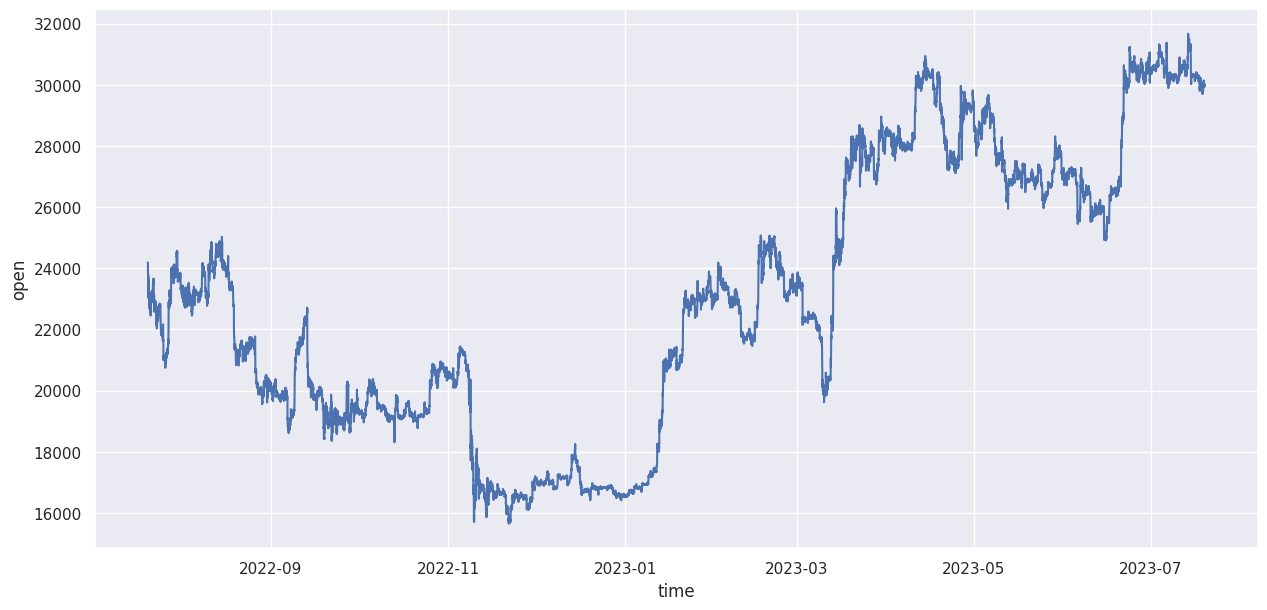

In [48]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,x='time',y='open')

# Correlation between trades and open price

<Axes: xlabel='open', ylabel='trades'>

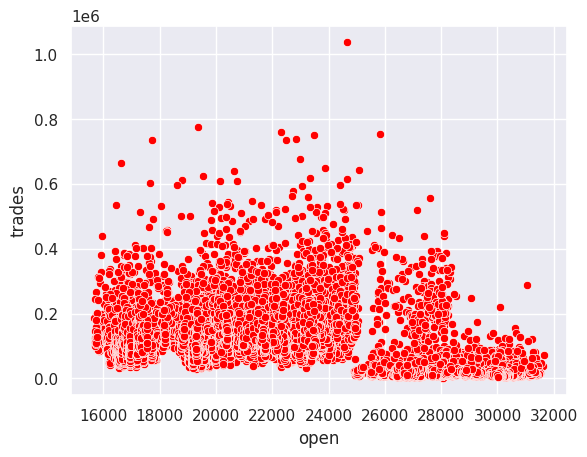

In [49]:
sns.scatterplot(data=df, x='open',y='trades',c='red')

# CREATING TIME TREND FEATURE

In [50]:
df['trend_2']=df.trend**2
df['trend_3']=df.trend**3
df['trend_4']=df.trend**4
X_time_trend=df[['trend','trend_2','trend_3','trend_4']]
y=df['open']

In [51]:
y_dummy = np.ones(len(y))*y.mean()

In [52]:
def check_model_full(model, X, y):
    model.fit(X, y)
    y_pred_1 = model.predict(X)
    print(f'r2 {r2_score(y,y_pred_1)}, absolute {mean_absolute_error(y,y_pred_1)}')
    sns.lineplot(data=df[len(df)-len(y):],x='time',y='open')
    sns.lineplot(x=df[len(df)-len(y):].time,y=y_pred_1,c='red')
    return y_pred_1

/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.956e+10, tolerance: 3.472e+07
  model = cd_fast.enet_coordinate_descent(


r2 0.8296882039972667, absolute 1577.4764404296875


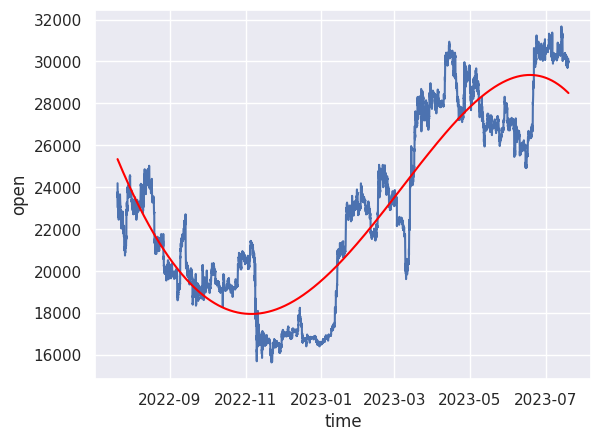

In [53]:
linear = check_model_full(Lasso(max_iter=1000), X_time_trend, y)

r2 0.979258518919093, absolute 465.8456115722656


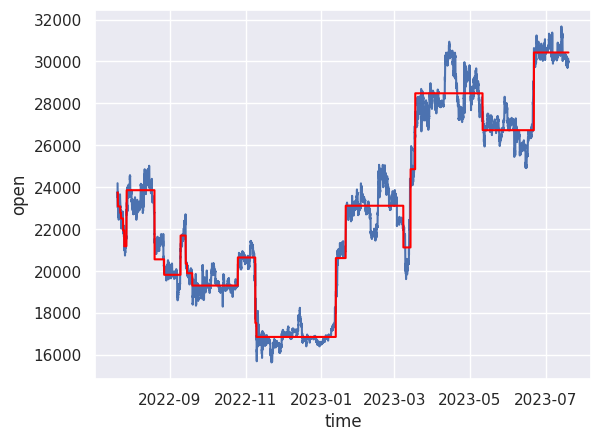

In [54]:
tree = check_model_full(XGBRegressor(n_estimators=2, max_depth=4, learning_rate=1), X_time_trend, y)

# CREATE MOVING AVERAGE

In [55]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()
    rolling_variance = series.rolling(window=window).std()
    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    return rolling_mean, rolling_variance

# weekly average 

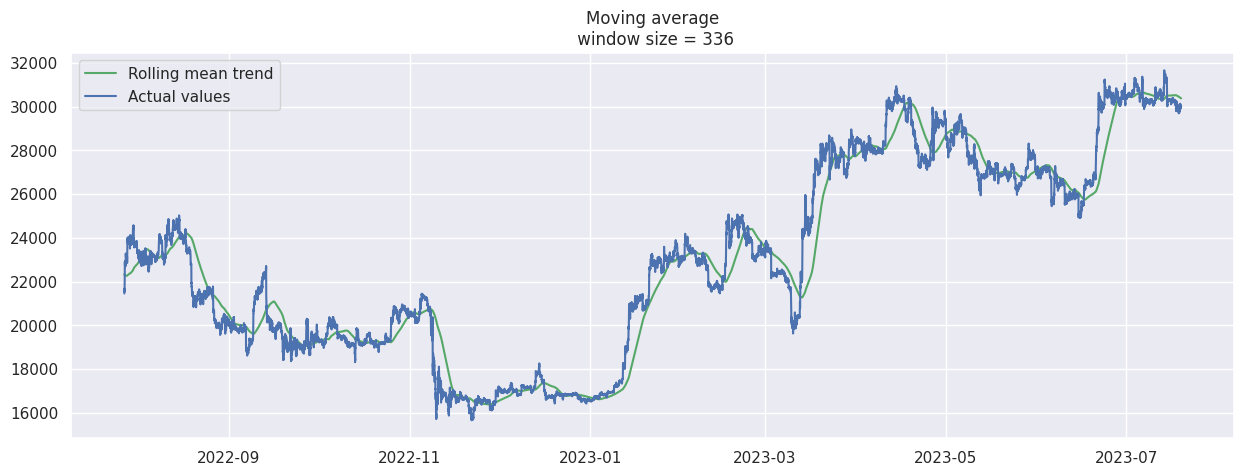

In [56]:
days=7
mov_av_w, mov_var_w = plotMovingAverage(y,int(48*days))

In [57]:
print(f'r2 {r2_score(y[int(48*days):],mov_av_w[int(48*days):])}, '
      f'absolute {mean_absolute_error(y[int(48*days):],mov_av_w[int(48*days):])}')

r2 0.9551546788042077, absolute 652.3570681915347


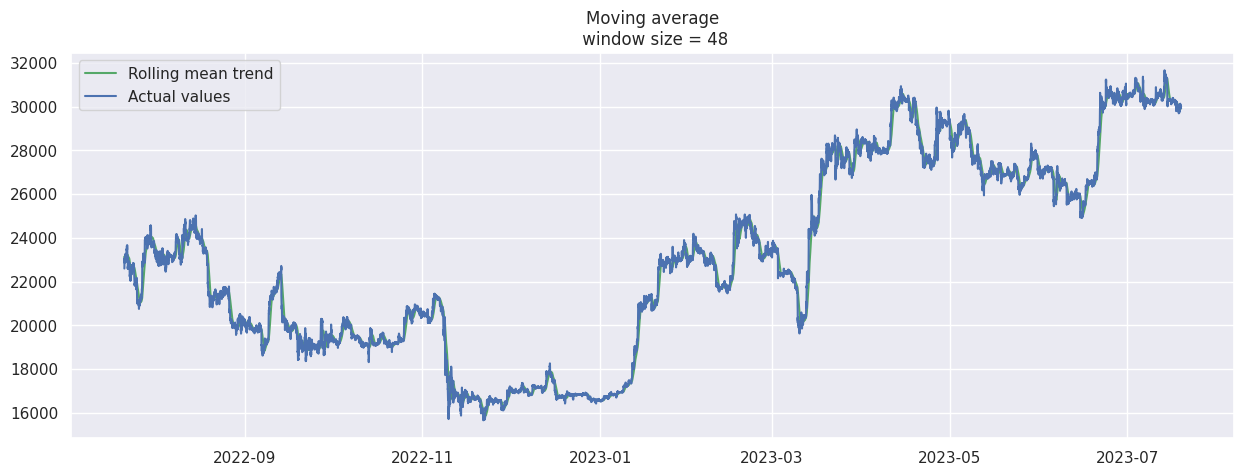

In [58]:
days=1
mov_av_d, mov_var_d = plotMovingAverage(y,int(48*days))

In [59]:
print(f'r2 {r2_score(y[int(48*days):],mov_av_d[int(48*days):])}, '
      f'absolute {mean_absolute_error(y[int(48*days):],mov_av_d[int(48*days):])}')

r2 0.9943184128951836, absolute 219.40702607682428


In [60]:
X=X_time_trend.copy()
X['trades'] = (df['trades'] - df['trades'].mean())/df.trades.std()
X['linear_trend'] = linear
X['tree_trend'] = tree
X['moving_average_weekly'] = mov_av_w
X['moving_average_daily'] = mov_av_d
X['moving_variance_weekly'] = mov_var_w
X['moving_variance_daily'] = mov_var_d
X['time'] = df.time

In [61]:
X.tail(5)

,trend,trend_2,trend_3,trend_4,trades,linear_trend,tree_trend,moving_average_weekly,moving_average_daily,moving_variance_weekly,moving_variance_daily,time
open_time,,,,,,,,,,,,
2023-07-19 10:00:00,17459.0,304816672.0,5.321794e+12,9.291321e+16,-1.080513,28499.560547,30428.365234,30395.574393,29920.699056,428.014490,117.347358,2023-07-19 10:00:00
2023-07-19 10:30:00,17460.0,304851584.0,5.322709e+12,9.293449e+16,-1.079285,28498.341797,30428.365234,30393.464483,29921.602580,428.254489,117.729405,2023-07-19 10:30:00
2023-07-19 11:00:00,17461.0,304886528.0,5.323623e+12,9.295579e+16,-1.091355,28497.128906,30428.365234,30391.404960,29921.547160,428.536301,117.696831,2023-07-19 11:00:00
2023-07-19 11:30:00,17462.0,304921440.0,5.324538e+12,9.297709e+16,-1.053200,28495.910156,30428.365234,30389.195167,29920.690063,428.692495,117.038276,2023-07-19 11:30:00
2023-07-19 12:00:00,17463.0,304956384.0,5.325453e+12,9.299839e+16,-1.110025,28494.695312,30428.365234,30386.922456,29923.369629,428.658591,117.651142,2023-07-19 12:00:00


In [62]:
y

open_time
2022-07-20 15:30:00    24193.519531
2022-07-20 16:00:00    24172.640625
2022-07-20 16:30:00    23854.119141
2022-07-20 17:00:00    23686.630859
2022-07-20 17:30:00    23632.279297
                           ...     
2023-07-19 10:00:00    30006.289062
2023-07-19 10:30:00    29991.500000
2023-07-19 11:00:00    29987.990234
2023-07-19 11:30:00    29988.849609
2023-07-19 12:00:00    30012.619141
Name: open, Length: 17464, dtype: float32

# Seasonal features

In [63]:
def fourier_features(X, freq, order=4):
    X_copy = X.copy()
    time = X.trend
    k =  2 * np.pi * (1 / freq) * time
    for i in range(1, order+1):
        X_copy[f'sin_{i}'] = np.sin(i*k)
        X_copy[f'cos_{i}'] = np.cos(i*k)
    return X_copy

In [64]:
X_fourier = fourier_features(X_time_trend, 365.25*48).drop(['trend','trend_2','trend_3','trend_4'],axis=1)

<Axes: xlabel='open_time'>

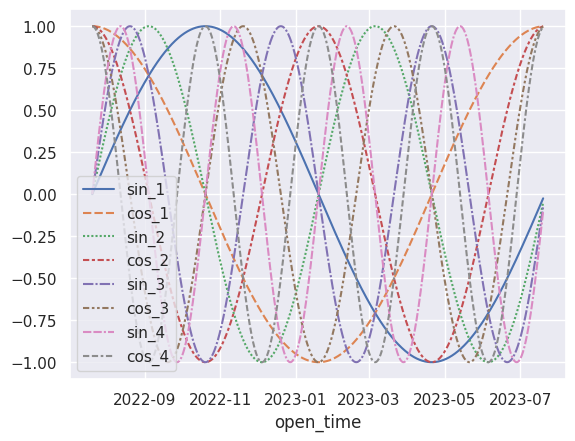

In [65]:
sns.lineplot(data=X_fourier)

In [66]:
X_fourier

,sin_1,cos_1,sin_2,cos_2,sin_3,cos_3,sin_4,cos_4
open_time,,,,,,,,
2022-07-20 15:30:00,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-07-20 16:00:00,0.000358,1.000000,0.000717,1.000000,0.001075,0.999999,0.001434,0.999999
2022-07-20 16:30:00,0.000717,1.000000,0.001434,0.999999,0.002150,0.999998,0.002867,0.999996
2022-07-20 17:00:00,0.001075,0.999999,0.002150,0.999998,0.003225,0.999995,0.004301,0.999991
2022-07-20 17:30:00,0.001434,0.999999,0.002867,0.999996,0.004301,0.999991,0.005734,0.999984
...,...,...,...,...,...,...,...,...
2023-07-19 10:00:00,-0.026159,0.999658,-0.052300,0.998631,-0.078405,0.996922,-0.104457,0.994529
2023-07-19 10:30:00,-0.025801,0.999667,-0.051584,0.998669,-0.077332,0.997005,-0.103030,0.994678
2023-07-19 11:00:00,-0.025443,0.999676,-0.050869,0.998705,-0.076262,0.997088,-0.101606,0.994825


r2 0.8875747761145991, absolute 1168.1087646484375


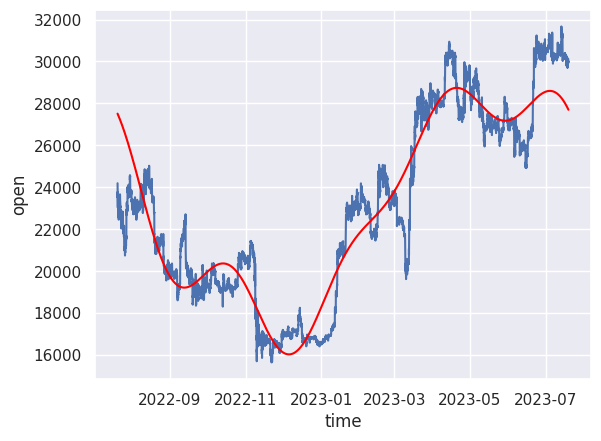

In [67]:
seasonal = check_model_full(Lasso(),X_fourier,y)

In [68]:
X['seasonal'] = seasonal

In [69]:
X.dtypes

trend                            float32
trend_2                          float32
trend_3                          float32
trend_4                          float32
trades                           float32
linear_trend                     float32
tree_trend                       float32
moving_average_weekly            float64
moving_average_daily             float64
moving_variance_weekly           float64
moving_variance_daily            float64
time                      datetime64[ns]
seasonal                         float32
dtype: object

# day of week, day of month, hour of day

In [70]:
dayofmonth = pd.Series(map(lambda x: x.date().day, X.time), index=X.index)
dayofweek = pd.Series(map(lambda x: x.date().weekday(), X.time), index=X.index)
hourofday = pd.Series(map(lambda x: x.time().hour, X.time), index=X.index)

In [71]:
X['day_of_month'] = dayofmonth
X['day_of_week'] = dayofweek
X['hour_of_day'] = hourofday

# Creating 1 day lags

In [72]:
def add_lags(X, interval='1h',count=24):
    X_copy = X.copy()
    if interval == '1h':
        for i in range(1,count+1):
            X_copy[f'lag_{i}h'] = y.shift(i)
    elif interval == '30m':
        for i in range(1,2*count+1):
            X_copy[f'lag_{i}'] = y.shift(i)
    return X_copy

In [73]:
X_lags = add_lags(X_time_trend).drop(['trend','trend_2','trend_3','trend_4'],axis=1)

r2 0.9996323113949136, absolute 50.08778381347656


array([22699.19 , 22752.605, 22767.174, ..., 29988.791, 29989.08 ,
       29990.773], dtype=float32)

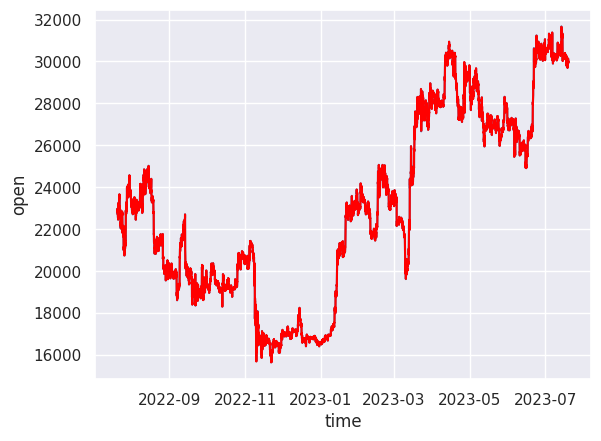

In [74]:
check_model_full(LinearRegression(),X_lags[24:],y[24:])

In [75]:
X=add_lags(X)

In [76]:
X.columns

Index(['trend', 'trend_2', 'trend_3', 'trend_4', 'trades', 'linear_trend',
       'tree_trend', 'moving_average_weekly', 'moving_average_daily',
       'moving_variance_weekly', 'moving_variance_daily', 'time', 'seasonal',
       'day_of_month', 'day_of_week', 'hour_of_day', 'lag_1h', 'lag_2h',
       'lag_3h', 'lag_4h', 'lag_5h', 'lag_6h', 'lag_7h', 'lag_8h', 'lag_9h',
       'lag_10h', 'lag_11h', 'lag_12h', 'lag_13h', 'lag_14h', 'lag_15h',
       'lag_16h', 'lag_17h', 'lag_18h', 'lag_19h', 'lag_20h', 'lag_21h',
       'lag_22h', 'lag_23h', 'lag_24h'],
      dtype='object')

In [77]:
X.tail()

,trend,trend_2,trend_3,trend_4,trades,linear_trend,tree_trend,moving_average_weekly,moving_average_daily,moving_variance_weekly,...,lag_15h,lag_16h,lag_17h,lag_18h,lag_19h,lag_20h,lag_21h,lag_22h,lag_23h,lag_24h
open_time,,,,,,,,,,,,,,,,,,,,,
2023-07-19 10:00:00,17459.0,304816672.0,5.321794e+12,9.291321e+16,-1.080513,28499.560547,30428.365234,30395.574393,29920.699056,428.014490,...,29972.009766,30006.000000,29990.000000,30055.310547,29921.660156,29859.140625,29836.339844,29819.679688,29784.839844,29800.859375
2023-07-19 10:30:00,17460.0,304851584.0,5.322709e+12,9.293449e+16,-1.079285,28498.341797,30428.365234,30393.464483,29921.602580,428.254489,...,30023.990234,29972.009766,30006.000000,29990.000000,30055.310547,29921.660156,29859.140625,29836.339844,29819.679688,29784.839844
2023-07-19 11:00:00,17461.0,304886528.0,5.323623e+12,9.295579e+16,-1.091355,28497.128906,30428.365234,30391.404960,29921.547160,428.536301,...,30053.650391,30023.990234,29972.009766,30006.000000,29990.000000,30055.310547,29921.660156,29859.140625,29836.339844,29819.679688
2023-07-19 11:30:00,17462.0,304921440.0,5.324538e+12,9.297709e+16,-1.053200,28495.910156,30428.365234,30389.195167,29920.690063,428.692495,...,30059.099609,30053.650391,30023.990234,29972.009766,30006.000000,29990.000000,30055.310547,29921.660156,29859.140625,29836.339844
2023-07-19 12:00:00,17463.0,304956384.0,5.325453e+12,9.299839e+16,-1.110025,28494.695312,30428.365234,30386.922456,29923.369629,428.658591,...,30140.000000,30059.099609,30053.650391,30023.990234,29972.009766,30006.000000,29990.000000,30055.310547,29921.660156,29859.140625


# Cross-Validation and choosing final model

In [80]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """

    # get the index after which test set starts
    test_index = int(len(X) * (1 - test_size))

    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, X_test, y_train, y_test

In [81]:
X['y'] = y
X = X.dropna().drop(['trend_4','time'],axis=1)
y = X['y']
X = X.drop('y',axis=1)

In [269]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.1)

In [270]:
def check_model_with_CV(model):
    print(f'CHECKING {model}')
    print()
    model.fit(X_train, y_train)

    print('Mean absolute error in train')
    print(mean_absolute_error(model.predict(X_train),y_train))
    print('Mean absolute error in test (1 percent of all data)')
    print(mean_absolute_error(model.predict(X_test),y_test))

    cv = cross_val_score(
                model, X_train, y_train, cv=tscv, scoring="neg_mean_absolute_error"
            )
    print()
    print('CROSS VALIDATION')
    for i in range(len(cv)):
        print(f'mean error in {i+1} split: '+ str(-cv[i]))
    return model

CHECKING LinearRegression()

Mean absolute error in train
49.583239772876084
Mean absolute error in test (1 percent of all data)
54.9342197728028

CROSS VALIDATION
mean error in 1 split: 4191.895554160833
mean error in 2 split: 164.01423419724213
mean error in 3 split: 114.56208765353932
mean error in 4 split: 65.15961297803321
mean error in 5 split: 55.096063748789405


<Axes: xlabel='open_time', ylabel='y'>

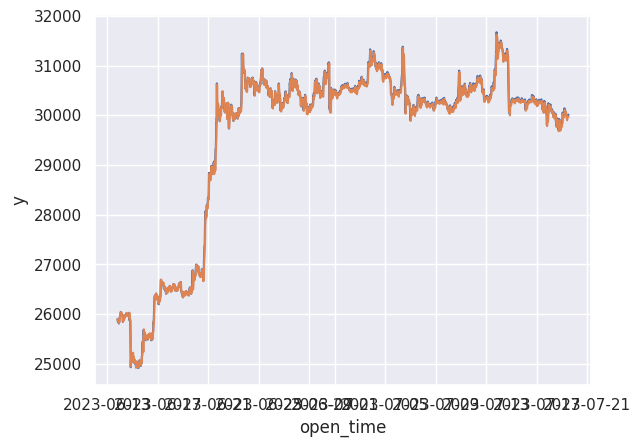

In [271]:
lr = check_model_with_CV(LinearRegression())

sns.lineplot(y_test)
sns.lineplot(pd.Series(lr.predict(X_test), index = y_test.index))

CHECKING RandomForestRegressor(max_depth=5, n_estimators=5)

Mean absolute error in train
101.10308465128124
Mean absolute error in test (1 percent of all data)
239.6154493919042

CROSS VALIDATION
mean error in 1 split: 166.83069445719207
mean error in 2 split: 181.52587945293752
mean error in 3 split: 103.08435878777708
mean error in 4 split: 2495.2055150124015
mean error in 5 split: 230.569437238097


<Axes: xlabel='open_time', ylabel='y'>

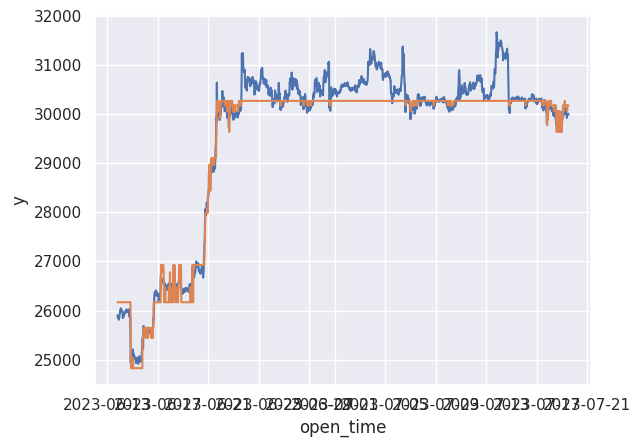

In [272]:
tree = check_model_with_CV(RandomForestRegressor(n_estimators=5, max_depth=5))

sns.lineplot(y_test)
sns.lineplot(pd.Series(tree.predict(X_test), index = y_test.index))

CHECKING Lasso(alpha=5, max_iter=5000)



/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.800e+07, tolerance: 2.605e+07
  model = cd_fast.enet_coordinate_descent(


Mean absolute error in train
50.64367724733615
Mean absolute error in test (1 percent of all data)
53.61577835529279


/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+07, tolerance: 7.560e+05
  model = cd_fast.enet_coordinate_descent(
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.085e+07, tolerance: 1.605e+06
  model = cd_fast.enet_coordinate_descent(
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.34


CROSS VALIDATION
mean error in 1 split: 64.50900048070761
mean error in 2 split: 47.692775093100565
mean error in 3 split: 47.83049596111077
mean error in 4 split: 66.81247145959863
mean error in 5 split: 55.624154341696524


/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.614e+07, tolerance: 1.779e+07
  model = cd_fast.enet_coordinate_descent(


<Axes: xlabel='open_time', ylabel='y'>

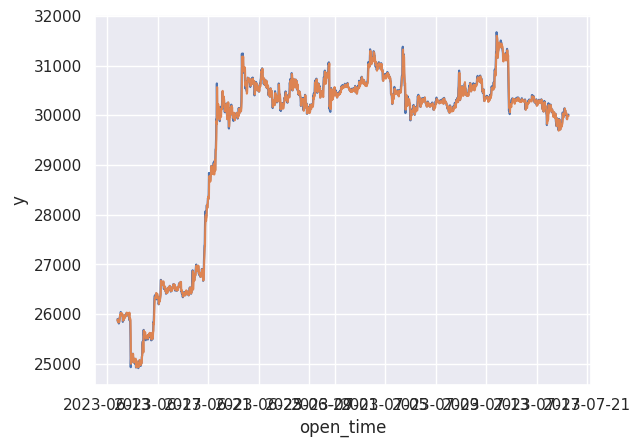

In [273]:
lasso = check_model_with_CV(Lasso(alpha=5,max_iter=5000))

sns.lineplot(y_test)
sns.lineplot(pd.Series(lasso.predict(X_test), index = y_test.index))

CHECKING Ridge(alpha=100, max_iter=5000)

Mean absolute error in train
49.58323032972474
Mean absolute error in test (1 percent of all data)
54.9333595090316

CROSS VALIDATION
mean error in 1 split: 329.2337601010105
mean error in 2 split: 99.49976847846739
mean error in 3 split: 112.30476991867722
mean error in 4 split: 65.15498009174942
mean error in 5 split: 55.09514522558516


/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.83172e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.5861e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.72202e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.33745e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kilka/.local/lib/python3.10/site-packages/sklearn/l

<Axes: xlabel='open_time', ylabel='y'>

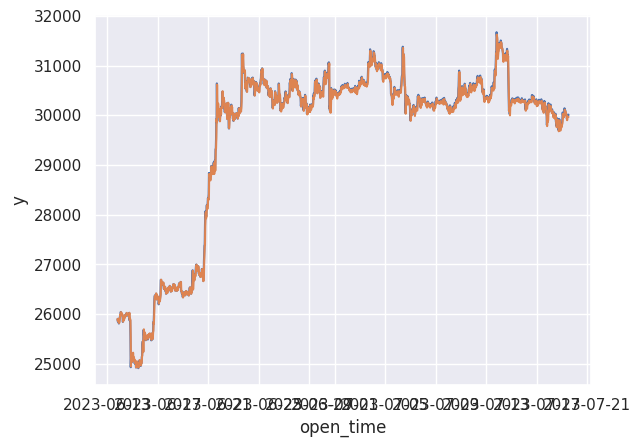

In [274]:
ridge = check_model_with_CV(Ridge(alpha=100,max_iter=5000))

sns.lineplot(y_test)
sns.lineplot(pd.Series(ridge.predict(X_test), index = y_test.index))

# Model evaluation for 1 month

In [324]:
def day_str(day):
    if day<=9:
        return '0'+str(day)
    return str(day)
def month_profit(model_fitted, month):
    total_profit = 0
    for day in range(1,10):
        sum_day = 0
        y_day = y[(y.index >= f"{month}-{day_str(day)} 00:00:00") & (y.index <= f"{month}-{day_str(day+1)} 00:00:00")]
        X_day = X[(X.index >= f"{month}-{day_str(day)} 00:00:00") & (X.index <= f"{month}-{day_str(day+1)} 00:00:00")]
        y_pred = model_fitted.predict(X_day)
        for i in range(1, len(y_day)):
            if y_pred[i]-y_day[i-1]>0:
                sum_day += ((100)*(y_day[i]/y_day[i-1]-1))
        print(f'Profit for day {day} is {sum_day}')
        total_profit += sum_day
    print()
    print()
    return total_profit

In [325]:
month='2023-05'
print(f'Total profit for {month} is {month_profit(lasso,month)}')

Profit for day 1 is 0.24679899215698242
Profit for day 2 is 2.4995803833007812
Profit for day 3 is 0.6155252456665039
Profit for day 4 is 0.2086043357849121
Profit for day 5 is 0.07323026657104492
Profit for day 6 is -0.729137659072876
Profit for day 7 is -0.8033633232116699
Profit for day 8 is -2.0508110523223877
Profit for day 9 is 0.7095217704772949


Total profit for 2023-05 is 0.7699489593505859


# mean and std

In [298]:
y_minus = lasso.predict(X) - y


SyntaxError: invalid syntax (2651871735.py, line 1)

In [299]:
y_minus.std()

86.64352474560467